<a href="https://colab.research.google.com/github/BilalWazir/ISYS2001-Assignment/blob/main/Enron_Business_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Report Notebook - Enron

---

####Name : Mohammed Bilal Wazir
####Student I.D. : 17384254
####Class : Thursday, 6P.M.
####Tutor : Mr.Michael Bork

---



## Summary

In this Report, we will be analysing and examining the trends and patterns of the E-mails sent within Enron Corporation employees, from 1996 to 2004. The purpose of this is to reveal some trends and patterns that emerge in the comparison of email usage over a period of times, and how that could be associated to to the Enron Corporate Fraud and followed by banruptcy of the company

Uning Python, we will be focusing on the following findngs:


*   The number of E-mails sent by date
*   The top ten E-mail users of the oganiations between the years of 1996 to 2004



##Introduction


Enron, a company that was formed in the 1985 as a result of a merger between Omaha and the Houston Natural Gas Co, and very quickly the company rebranded itself into the energy trading and supplying sector. Following the success, Jeffrey Skilling had joined the company as the youngest partners.

Skilling then had introduced Enron Corporations to transition from traditional historic cost method to a mark-to-market accounting method. This method was a measure of the fair value of their accounts that could change over time. This method was meant to provide a more accurate appraisal of the companies current financial strenght, it can also be manipulated easily as it doesnt go baes off 'actual cost' but 'fair value' of an asset, which is harder to standadise. 

In 1999, Enron had launched their new service, called EnronOnline (EOL). This website was an online trading platform that would focus on commodities. Enron would be the counter-party to every transaction on the website. enron also offere its reputation and recognition in the energy sector to lure in more participants. Enron was also offered "America's Most Innovative Company' award 6 conecutive years, thanks to this project.

By 2000, everything started to crumble around Enron. Skilling had been hiding the financial losses of EOL and other operations using his MTM accounting method. This was because with MTM the current makret value was used and not its actual book value. This practice had given Enron the ability to make the company to appear more profitable than it actually was. Enron had come to a halting stop after the SEC has sone their investigations and found them guilty of hiding debt.



## Analysis

By analysing the Enron E-mail Database, which was made public by the SEC, we will atempt to see what conclusions we can come up to with who had contributed to the Scandal. We will be running a series of Python Codes to extract the data that we will need in order to do this. In order to view the Data please run the cells containing the code by clicking ont he play button to the left of the box.

Lets begin by Importing the E-mail Database of Enrons employees, please run the code below.

In [1]:
#@title

# Now we add codes to upload the file containing the full database
from google.colab import output
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
output.clear()
print("Full Email Database Imported")

# First we add run the codes to get the file of the extract database
from google.colab import output
!wget -O extract.db !wget -O extract.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EbNeFqkc_g1EmQZzAKqc_w8BYeUTUVyexiSsmDbZb1EqAQ?download=1 
output.clear()
print("Enron Email Dataset Extracted")

Enron Email Dataset Extracted


Now Let us Extract some of the dates and number of emails sents from the database, upon inspecting SQLite, we can see that this log exists in the table titles "messages". 

In order to do that, please run the cell below

[('0001-05-30', 2), ('0001-06-18', 1), ('0001-07-24', 1), ('0001-08-01', 1), ('0001-08-06', 1), ('0001-08-13', 1), ('0001-08-21', 1), ('0001-08-22', 1), ('0001-08-26', 1), ('0001-08-27', 1), ('0001-08-28', 4), ('0001-08-30', 1), ('0001-09-03', 1), ('0001-09-05', 2), ('0001-09-13', 1), ('0001-09-17', 1), ('0001-09-19', 1), ('0001-09-20', 1), ('0001-09-21', 1), ('0001-09-26', 1), ('0001-10-04', 1), ('0001-10-05', 1), ('0001-10-08', 1), ('0001-10-12', 1), ('0001-10-15', 3), ('0001-10-16', 3), ('0001-10-17', 4), ('0001-10-18', 8), ('0001-10-19', 1), ('0001-10-21', 1), ('0001-10-22', 6), ('0001-10-24', 1), ('0001-10-25', 4), ('0001-10-26', 8), ('0001-10-29', 18), ('0001-10-30', 1), ('0001-11-02', 1), ('0001-11-08', 1), ('0001-11-14', 1), ('0001-11-15', 1), ('0001-11-19', 10), ('0001-11-20', 3), ('0001-11-21', 7), ('0001-11-22', 3), ('0001-11-23', 1), ('0001-11-25', 1), ('0001-11-26', 9), ('0001-11-27', 15), ('0001-11-28', 2), ('0001-11-29', 2), ('0001-11-30', 1), ('0001-12-03', 3), ('0001-1

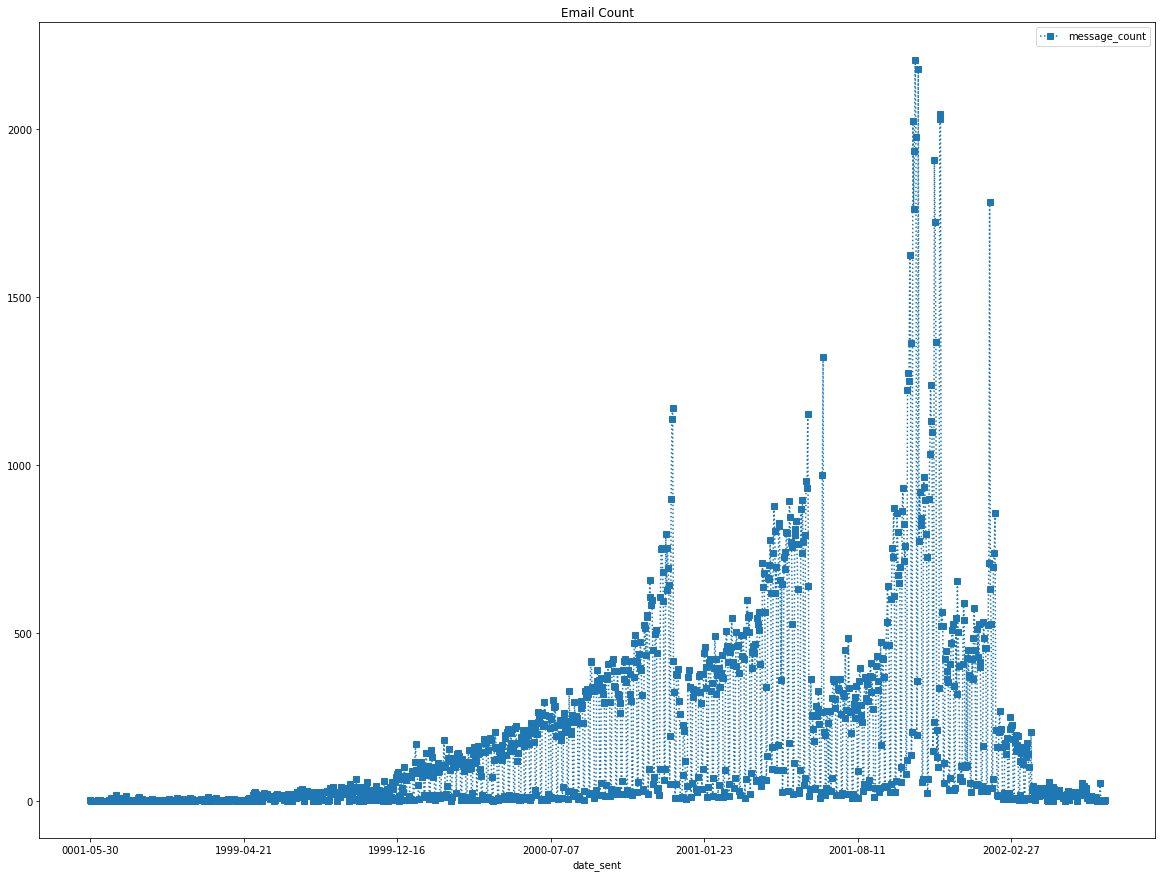

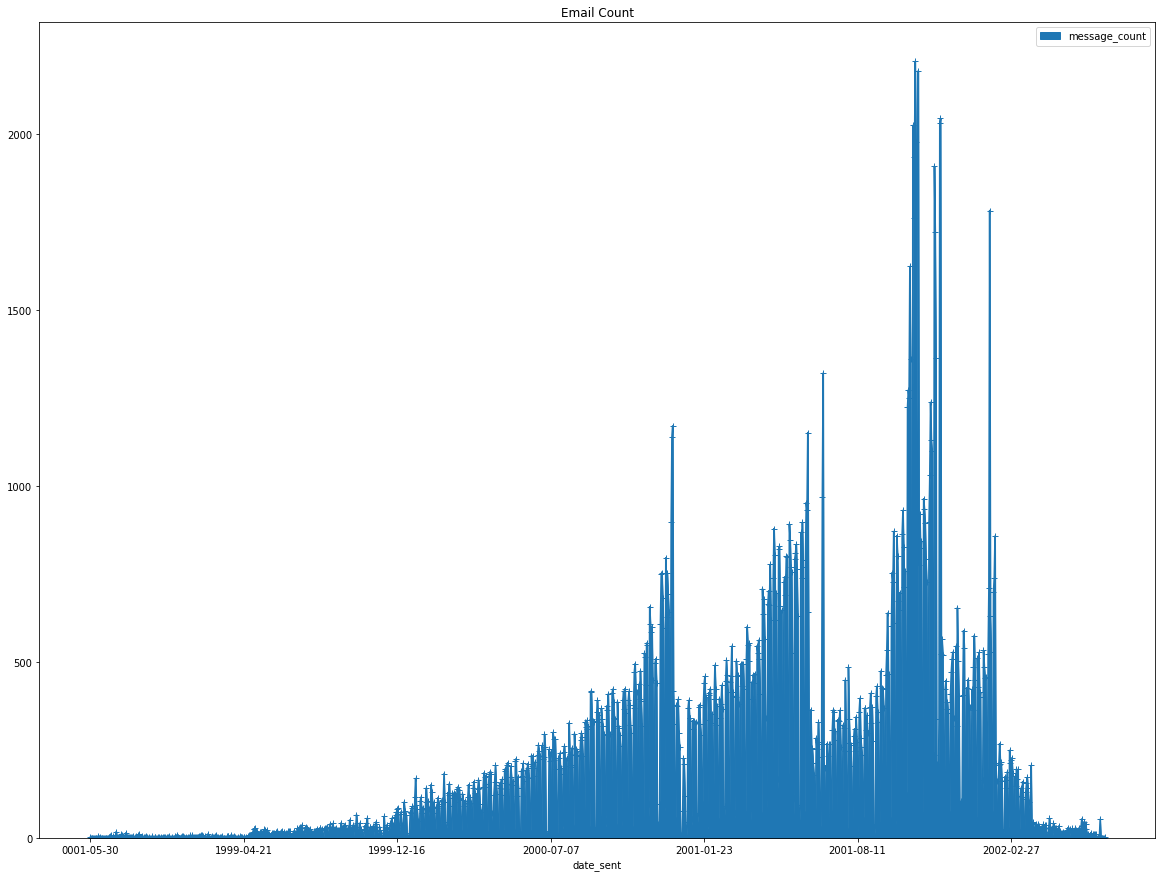

In [2]:
#@title

from datetime import date
# Importing Pandas to handle the database as dataframe
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Importing SQlite3  and creating a cursor
import sqlite3
connection = sqlite3.connect("enron.db")
cursor = connection.cursor()


#SQL command retriving date sent and message count details from message table
sql = '''
 SELECT date(date) AS date_sent, count(mid) AS message_count    
  FROM message    
  GROUP BY date_sent    
  ORDER BY date_sent; 
'''
df = pd.read_sql_query(sql, connection)

print(cursor.execute(sql))
print(cursor.fetchall())
print(connection.commit())

# Clean up the date range from 1996 to 2003

index = pd.date_range(start='1998-01-01', end = '2004-01-01', freq='M').tolist()
print(index)

#Plot a line graph to display the message count

user_df = pd.read_sql_query(sql, connection)
user_df = user_df[user_df['date_sent'].isin(index)]
user_df.head()

# Plot a line graph to display the message count


user_df = pd.read_sql_query(sql, connection)
user_df
plot = user_df.plot.line(title="Email Count", x='date_sent', y='message_count', style='s:', figsize=(20,15))
plot = user_df.plot.area(title="Email Count", x='date_sent', y='message_count', style='+-', figsize=(20,15))


Here we can see the spread of the emails sent per day, with the date sent in the X-axis and the email count int he Y-axis. We can see that there was a huge spike in emails sent beginning of 2000 and ending 2002. 

Then we can further see that between end of 2000 and end of 2001, there was alot more emails sent around withing the company, this is roughly around the time that Enron was being exposed in public and the debt of the company was crushing inder its own weight. 

Using the Interactive plot below, we can see the numbers of emails sent per day.

Run the cell below to view the graph

In [7]:
#@title

import plotly.express as px

user_df = pd.read_sql_query(sql, connection)
user_df

fig = px.line(df, title="Email Count", x='date_sent', y='message_count')
fig.show()

Using the Graph above, we can zoom into the sections with the higher emails per day and using the cursor, when we float it on the graph, we can further see the number of emails sent and the date that they were sent on.

for example, this is how we can select the range on the table 

<img src = "https://raw.githubusercontent.com/BilalWazir/ISYS2001-Assignment/main/Screenshot%202022-06-04%20110542.png">

and using the cursor, this is how we can check the specifics of the email count and the date of when they were sent

<img src = "https://raw.githubusercontent.com/BilalWazir/ISYS2001-Assignment/main/Screenshot%202022-06-04%20110859.png">

We can even run a code to create a table that displays the top 10 periods of when emails were sent. in order to view that lets run the code below.




In [4]:
#@title

#SQL command retriving date sent and message count details from message table
sql = '''
 SELECT date(date) AS date_sent, count(mid) AS message_count    
  FROM message    
  GROUP BY date_sent    
  ORDER BY date_sent; 
'''

#Read the sql file and show date:
user_df = pd.read_sql_query(sql, connection)
user_df
user_df.nlargest(n=10, columns=['message_count'], keep='all')

,date_sent,message_count
1075,2001-10-25,2207
1079,2001-10-29,2180
1108,2001-11-27,2045
1107,2001-11-26,2031
1072,2001-10-22,2025
1076,2001-10-26,1978
1074,2001-10-24,1936
1100,2001-11-19,1909
1172,2002-01-30,1783
1073,2001-10-23,1763


Looking at the chart, we can see that the most emails were sent at the end of 2001. this conincides with the how the company went public in October 2001 about their true financial status and declared bankrupt in December 2001. on the 25th of October was also when Enron employees sent out emails in regards to the reports the press were putting out about their accounting malpractices and the dissolving of their LJM partnership. This is when Enron employees were scattering to find ways to keep their credibility for the shareholders and the public after the news broke out so they didnt suffer a massive blow.


Now, we will run some code to get a table of the top ten emailers within the Encorp Corporation. In order to see the list, please run the code below to see the table generated.

In [11]:
#@title
#SQL command retriving date sent and message count details from message table
sql = '''
SELECT sender, count(mid) AS message_count
 FROM message
 GROUP BY sender
 ORDER BY message_count;
'''
#Read the sql file and show date:
user_df = pd.read_sql_query(sql, connection)
user_df
user_df.nlargest(n=10, columns=['message_count'], keep='all')


,sender,message_count
17526,jeff.dasovich@enron.com,6273
17525,j.kaminski@enron.com,5838
17524,kay.mann@enron.com,5100
17523,sara.shackleton@enron.com,4797
17522,tana.jones@enron.com,4437
17521,chris.germany@enron.com,3686
17520,no.address@enron.com,3511
17519,enron.announcements@enron.com,2838
17518,matthew.lenhart@enron.com,2784
17517,debra.perlingiere@enron.com,2549


In [6]:
#@title

import plotly.express as px

#SQL command retriving date sent and message count details from message table
sql = '''
SELECT sender, count(mid) AS message_count
 FROM message
 GROUP BY sender
 ORDER BY message_count;
'''
#Connect the dataframe tot he sql query
user_df = pd.read_sql_query(sql, connection)

#collect the ten highest email senders
user_df = user_df.nlargest(n=10, columns=['message_count'], keep='all')

#Plot the data frame
fig = px.bar(user_df, x='sender', y='message_count')
fig.show()